In [1]:
import math

In [2]:
import pandas_datareader as web

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
#from sklearn import preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from keras.models import Sequential

In [8]:
from keras.layers import Dense, LSTM

In [9]:
import matplotlib.pyplot as plt

In [10]:
import datetime
from datetime import date

In [11]:
plt.style.use('fivethirtyeight')

In [12]:
stock = 'goog'

years_of_data_to_process = 25
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

In [13]:
df = web.DataReader(stock, data_source='yahoo', start = start, end = date)
df.dropna(inplace= True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
...,...,...,...,...,...,...
2021-06-14,2528.229980,2500.939941,2513.389893,2527.040039,1127500.0,2527.040039
2021-06-15,2537.239990,2512.969971,2530.439941,2520.659912,1109100.0,2520.659912
2021-06-16,2530.469971,2482.999023,2524.949951,2513.929932,1315800.0,2513.929932


In [14]:
df.shape

(4238, 6)

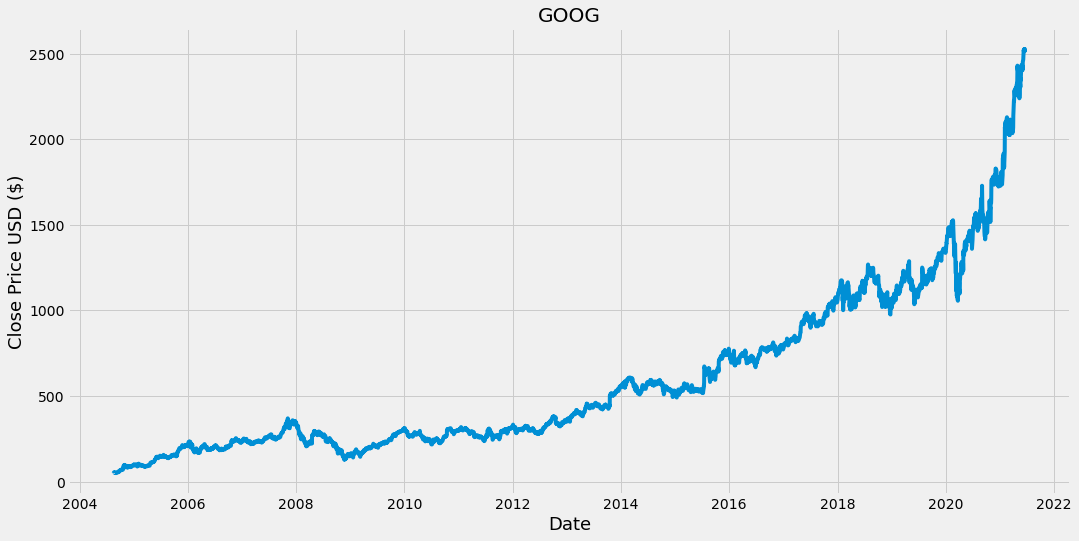

In [15]:
plt.figure(figsize=(16,8))

plt.title(stock.upper())
#plt.title( plt.title(str(stock)))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [16]:
data =df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) *.8)
training_data_len

3391

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data

In [18]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
#    if i <= 60:
#        print (x_train)
#        print (y_train)
#        print ()
    

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(3331, 60, 1)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
    

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x_train, y_train, batch_size=128, epochs=200)

Epoch 1/200
27/27 [==============================] - 16s 58ms/step - loss: 0.0121
Epoch 2/200
27/27 [==============================] - 2s 83ms/step - loss: 2.2493e-04
Epoch 3/200
27/27 [==============================] - 2s 80ms/step - loss: 5.1114e-05
Epoch 4/200
27/27 [==============================] - 2s 67ms/step - loss: 4.7818e-05
Epoch 5/200
27/27 [==============================] - 2s 66ms/step - loss: 4.1141e-05
Epoch 6/200
27/27 [==============================] - 2s 65ms/step - loss: 3.8250e-05
Epoch 7/200
27/27 [==============================] - 2s 66ms/step - loss: 3.8721e-05
Epoch 8/200
27/27 [==============================] - 2s 62ms/step - loss: 4.1102e-05
Epoch 9/200
27/27 [==============================] - 2s 62ms/step - loss: 4.1770e-05
Epoch 10/200
27/27 [==============================] - 2s 62ms/step - loss: 4.1063e-05
Epoch 11/200
27/27 [==============================] - 2s 62ms/step - loss: 4.0146e-05
Epoch 12/200
27/27 [==============================] - 2s 61ms/step

27/27 [==============================] - 1s 55ms/step - loss: 1.8124e-05
Epoch 96/200
27/27 [==============================] - 2s 59ms/step - loss: 1.7688e-05
Epoch 97/200
27/27 [==============================] - 2s 71ms/step - loss: 1.7940e-05
Epoch 98/200
27/27 [==============================] - 1s 55ms/step - loss: 1.9001e-05
Epoch 99/200
27/27 [==============================] - 1s 54ms/step - loss: 1.8508e-05
Epoch 100/200
27/27 [==============================] - 1s 53ms/step - loss: 2.0167e-05
Epoch 101/200
27/27 [==============================] - 1s 54ms/step - loss: 1.8663e-05
Epoch 102/200
27/27 [==============================] - 1s 53ms/step - loss: 1.7540e-05
Epoch 103/200
27/27 [==============================] - 1s 54ms/step - loss: 2.9591e-05
Epoch 104/200
27/27 [==============================] - 1s 55ms/step - loss: 1.8801e-05
Epoch 105/200
27/27 [==============================] - 1s 54ms/step - loss: 1.9974e-05
Epoch 106/200
27/27 [==============================] - 1s 53m

27/27 [==============================] - 2s 62ms/step - loss: 1.0750e-05
Epoch 190/200
27/27 [==============================] - 2s 60ms/step - loss: 9.3208e-06
Epoch 191/200
27/27 [==============================] - 2s 57ms/step - loss: 9.8091e-06
Epoch 192/200
27/27 [==============================] - 2s 58ms/step - loss: 1.1209e-05
Epoch 193/200
27/27 [==============================] - 1s 55ms/step - loss: 1.0434e-05
Epoch 194/200
27/27 [==============================] - 1s 55ms/step - loss: 1.8710e-05
Epoch 195/200
27/27 [==============================] - 1s 55ms/step - loss: 1.0271e-05
Epoch 196/200
27/27 [==============================] - 1s 55ms/step - loss: 1.5928e-05
Epoch 197/200
27/27 [==============================] - 1s 55ms/step - loss: 1.0326e-05
Epoch 198/200
27/27 [==============================] - 1s 55ms/step - loss: 1.2078e-05
Epoch 199/200
27/27 [==============================] - 1s 54ms/step - loss: 9.2106e-06
Epoch 200/200
27/27 [==============================] - 2s

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [26]:
x_test = np.array(x_test)

In [27]:
x_test =  np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
predictions = model.predict(x_test)
predictions =  scaler.inverse_transform(predictions)

In [29]:
rmse = np.sqrt(np.mean(predictions -y_test) **2)
print ("    RMSE = %f.4" %rmse)

    RMSE = 11.053454.4


In [30]:
data.info

<bound method DataFrame.info of                   Close
Date                   
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239197
2004-08-25    52.802086
...                 ...
2021-06-14  2527.040039
2021-06-15  2520.659912
2021-06-16  2513.929932
2021-06-17  2527.419922
2021-06-18  2511.350098

[4238 rows x 1 columns]>

<ipython-input-31-0f910c29bbee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

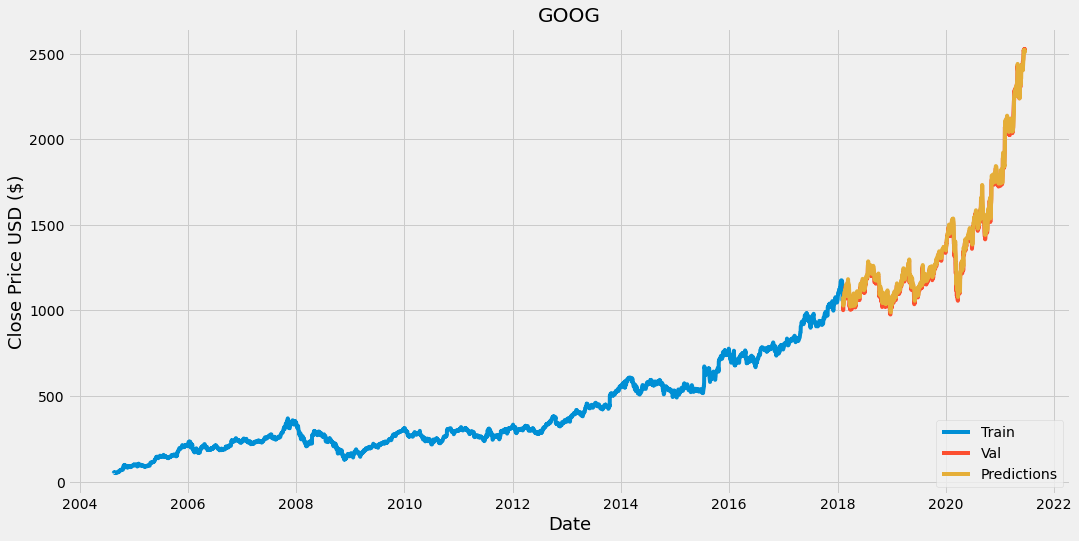

In [31]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title(stock.upper())
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
#default_x_ticks = range(len(data['Date']))
#plt.xticks(default_x_ticks, data['Date'])

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.plot()
plt.show

In [32]:
print(valid)

                  Close  Predictions
Date                                
2018-02-07  1048.579956  1081.277100
2018-02-08  1001.520020  1067.304810
2018-02-09  1037.780029  1028.376221
2018-02-12  1051.939941  1045.161499
2018-02-13  1052.099976  1068.053955
...                 ...          ...
2021-06-14  2527.040039  2514.229248
2021-06-15  2520.659912  2522.068848
2021-06-16  2513.929932  2515.885742
2021-06-17  2527.419922  2507.581299
2021-06-18  2511.350098  2520.961670

[847 rows x 2 columns]


In [33]:
# print (valid.iloc[-1,0], valid.iloc[-1,1])
print ("\n ============> Close Price over Predicate Price \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %((valid.iloc[-5,0] - valid.iloc[-5,1]), (valid.iloc[-4,0] - valid.iloc[-4,1]),(valid.iloc[-3,0] - valid.iloc[-3,1]),(valid.iloc[-2,0] - valid.iloc[-2,1]),(valid.iloc[-1,0] - valid.iloc[-1,1])))


 ============> Close Price over Predicate Price 
 ============> 12.8108....-1.4089....-1.9558....19.8386....-9.6116....<=============


In [34]:
stock_quote = web.DataReader(stock, data_source =  'yahoo', start = start , end = date)
new_df = stock_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2508.8674]]


In [35]:
#stock_quote2 = web.DataReader(stock, data_source =  'yahoo', start = date , end = date)
#print (stock_quote2['Close'])